In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
movies=pd.read_csv('aggregated_movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36667 entries, 0 to 36666
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           36667 non-null  int64  
 1   name         36667 non-null  object 
 2   date         36518 non-null  float64
 3   tagline      21731 non-null  object 
 4   description  36638 non-null  object 
 5   minute       36417 non-null  float64
 6   rating       36369 non-null  float64
 7   actor        35808 non-null  object 
 8   director     36530 non-null  object 
 9   genre        36498 non-null  object 
 10  language     35685 non-null  object 
 11  poster       36656 non-null  object 
 12  theme        19202 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.6+ MB


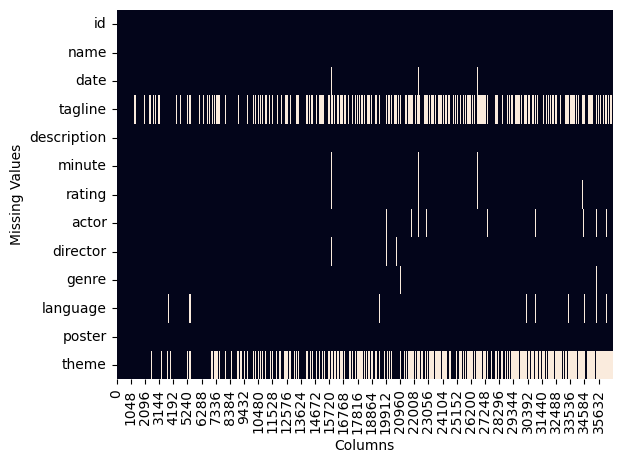

In [3]:
sns.heatmap(movies.isna().transpose(),cbar=False,ax=plt.axes())
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.show()

In [4]:
movies.drop(columns=['tagline'],axis=1,inplace=True)
movies.head()

,id,name,date,description,minute,rating,actor,director,genre,language,poster,theme
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,"Margot Robbie, Ryan Gosling, America Ferrera, ...",Greta Gerwig,"Comedy, Adventure",English,https://a.ltrbxd.com/resized/film-poster/2/7/7...,Humanity and the world around us.Crude humor a...
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",Bong Joon-ho,"Comedy, Thriller, Drama","Korean, English, German, Korean",https://a.ltrbxd.com/resized/film-poster/4/2/6...,Humanity and the world around us.Intense viole...
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"Michelle Yeoh, Ke Huy Quan, Stephanie Hsu, Jam...","Daniel Scheinert, Daniel Kwan","Science Fiction, Adventure, Comedy, Action","English, Cantonese, Chinese, English",https://a.ltrbxd.com/resized/film-poster/4/7/4...,Humanity and the world around us.Moving relati...
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,"Edward Norton, Brad Pitt, Helena Bonham Carter...",David Fincher,Drama,English,https://a.ltrbxd.com/resized/film-poster/5/1/5...,Intense violence and sexual transgression.Huma...
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"Ryan Gosling, Emma Stone, John Legend, Rosemar...",Damien Chazelle,"Drama, Comedy, Music, Romance",English,https://a.ltrbxd.com/resized/film-poster/2/4/0...,Song and dance.Humanity and the world around u...


In [5]:
movies['missing_description']=np.where(movies['description'].isna(),1,0)
movies['age']=2025-movies['date']
movies.head()

,id,name,date,description,minute,rating,actor,director,genre,language,poster,theme,missing_description,age
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,"Margot Robbie, Ryan Gosling, America Ferrera, ...",Greta Gerwig,"Comedy, Adventure",English,https://a.ltrbxd.com/resized/film-poster/2/7/7...,Humanity and the world around us.Crude humor a...,0,2.0
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",Bong Joon-ho,"Comedy, Thriller, Drama","Korean, English, German, Korean",https://a.ltrbxd.com/resized/film-poster/4/2/6...,Humanity and the world around us.Intense viole...,0,6.0
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"Michelle Yeoh, Ke Huy Quan, Stephanie Hsu, Jam...","Daniel Scheinert, Daniel Kwan","Science Fiction, Adventure, Comedy, Action","English, Cantonese, Chinese, English",https://a.ltrbxd.com/resized/film-poster/4/7/4...,Humanity and the world around us.Moving relati...,0,3.0
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,"Edward Norton, Brad Pitt, Helena Bonham Carter...",David Fincher,Drama,English,https://a.ltrbxd.com/resized/film-poster/5/1/5...,Intense violence and sexual transgression.Huma...,0,26.0
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"Ryan Gosling, Emma Stone, John Legend, Rosemar...",Damien Chazelle,"Drama, Comedy, Music, Romance",English,https://a.ltrbxd.com/resized/film-poster/2/4/0...,Song and dance.Humanity and the world around u...,0,9.0


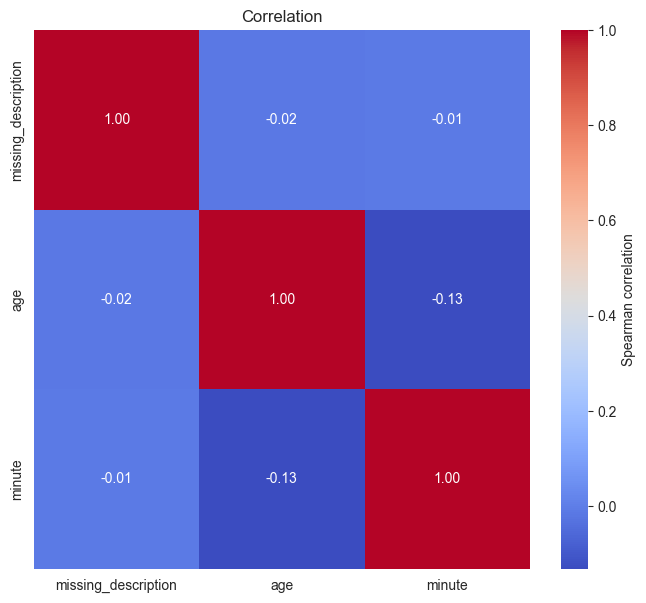

In [6]:
columns_of_interest=['missing_description','age','minute']
correlation_matrix=movies[columns_of_interest].corr(method='spearman')

sns.set_style('white')
plt.figure(figsize=(8,7))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',cbar_kws={'label':'Spearman correlation'})
plt.title('Correlation')
plt.show()

In [7]:
movies.drop(columns=['missing_description','age'],axis=1,inplace=True)
movies.head()

,id,name,date,description,minute,rating,actor,director,genre,language,poster,theme
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,"Margot Robbie, Ryan Gosling, America Ferrera, ...",Greta Gerwig,"Comedy, Adventure",English,https://a.ltrbxd.com/resized/film-poster/2/7/7...,Humanity and the world around us.Crude humor a...
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",Bong Joon-ho,"Comedy, Thriller, Drama","Korean, English, German, Korean",https://a.ltrbxd.com/resized/film-poster/4/2/6...,Humanity and the world around us.Intense viole...
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"Michelle Yeoh, Ke Huy Quan, Stephanie Hsu, Jam...","Daniel Scheinert, Daniel Kwan","Science Fiction, Adventure, Comedy, Action","English, Cantonese, Chinese, English",https://a.ltrbxd.com/resized/film-poster/4/7/4...,Humanity and the world around us.Moving relati...
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,"Edward Norton, Brad Pitt, Helena Bonham Carter...",David Fincher,Drama,English,https://a.ltrbxd.com/resized/film-poster/5/1/5...,Intense violence and sexual transgression.Huma...
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"Ryan Gosling, Emma Stone, John Legend, Rosemar...",Damien Chazelle,"Drama, Comedy, Music, Romance",English,https://a.ltrbxd.com/resized/film-poster/2/4/0...,Song and dance.Humanity and the world around u...


In [8]:
movies[movies['description'].isna()|
       movies['minute'].isna()|
       movies['date'].isna()]

,id,name,date,description,minute,rating,actor,director,genre,language,poster,theme
2572,1002573,Nosferatu,2024.0,A gothic tale of obsession between a haunted y...,NaN,NaN,"Bill Skarsgård, Lily-Rose Depp, Nicholas Hoult...",Robert Eggers,"Drama, Fantasy, Horror","English, English, German, Romanian, Russian",https://a.ltrbxd.com/resized/film-poster/3/5/9...,NaN
3529,1003530,Spider-Man: Beyond the Spider-Verse,NaN,Taking place right after the events of Spider-...,NaN,NaN,"Shameik Moore, Hailee Steinfeld, Brian Tyree H...","Joaquim Dos Santos, Kemp Powers, Justin K. Tho...","Adventure, Action, Science Fiction, Animation",English,https://a.ltrbxd.com/resized/film-poster/8/1/8...,NaN
4679,1004680,The Batman - Part II,2026.0,Sequel to the 2022 film The Batman.,NaN,NaN,"Robert Pattinson, Jeffrey Wright",Matt Reeves,"Action, Drama, Crime",English,https://a.ltrbxd.com/resized/film-poster/7/2/3...,NaN
5493,1005494,Wake Up Dead Man: A Knives Out Mystery,NaN,Benoit Blanc returns in his most dangerous cas...,NaN,NaN,"Daniel Craig, Josh O'Connor, Cailee Spaeny, An...",Rian Johnson,"Crime, Comedy, Mystery",English,https://a.ltrbxd.com/resized/film-poster/7/2/9...,NaN
5554,1005555,Wicked,2024.0,"Elphaba, an ostracized but defiant girl born w...",NaN,NaN,"Cynthia Erivo, Ariana Grande, Jonathan Bailey,...",Jon M. Chu,"Romance, Drama, Fantasy",English,https://a.ltrbxd.com/resized/film-poster/3/3/7...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
36095,1036096,Spaceless,NaN,A man wakes up inside a spacesuit tumbling hel...,NaN,NaN,NaN,Gore Verbinski,Science Fiction,English,https://a.ltrbxd.com/resized/film-poster/3/9/5...,NaN
36255,1036256,Separate Rooms,NaN,Fleeing from the image of his boyfriend who re...,NaN,NaN,"Josh O'Connor, Léa Seydoux",Luca Guadagnino,"Romance, Drama",Italian,https://a.ltrbxd.com/resized/film-poster/1/1/4...,NaN
36420,1036421,The Front Room,2024.0,"A young, newly pregnant couple is forced to ta...",NaN,NaN,"Brandy, Kathryn Hunter, Andrew Burnap, Neal Hu...","Max Eggers, Sam Eggers","Mystery, Horror",English,https://a.ltrbxd.com/resized/film-poster/9/1/5...,NaN
36552,1036553,Untitled Julia Ducournau & A24 Project,NaN,An announced collaboration between celebrated ...,NaN,NaN,NaN,Julia Ducournau,NaN,English,https://a.ltrbxd.com/resized/film-poster/1/0/1...,NaN


In [9]:
movies_st1=movies[~movies['description'].isna()&
                  ~movies['minute'].isna()&
                  ~movies['date'].isna()]
movies_st1.describe(include='all')

,id,name,date,description,minute,rating,actor,director,genre,language,poster,theme
count,3.638700e+04,36387,36387.000000,36387,36387.000000,36309.000000,35566,36279,36223,35407,36385,19186
unique,NaN,34079,NaN,36366,NaN,NaN,35129,15662,4941,2836,36385,15227
top,NaN,Alice in Wonderland,NaN,Miser Ebenezer Scrooge is awakened on Christma...,NaN,NaN,Georges Méliès,Alfred Hitchcock,Drama,English,https://a.ltrbxd.com/resized/film-poster/2/7/7...,Westerns.Wild west outlaws and gunfights.Weste...
freq,NaN,9,NaN,5,NaN,NaN,21,55,4109,17737,1,56
mean,1.018297e+06,NaN,1998.492071,NaN,108.485173,3.278845,NaN,NaN,NaN,NaN,NaN,NaN
std,1.058960e+04,NaN,24.294796,NaN,284.789494,0.525735,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000001e+06,NaN,1874.000000,NaN,1.000000,0.880000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.009120e+06,NaN,1986.000000,NaN,87.000000,2.970000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.018280e+06,NaN,2007.000000,NaN,98.000000,3.360000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.027470e+06,NaN,2017.000000,NaN,112.000000,3.650000,NaN,NaN,NaN,NaN,NaN,NaN


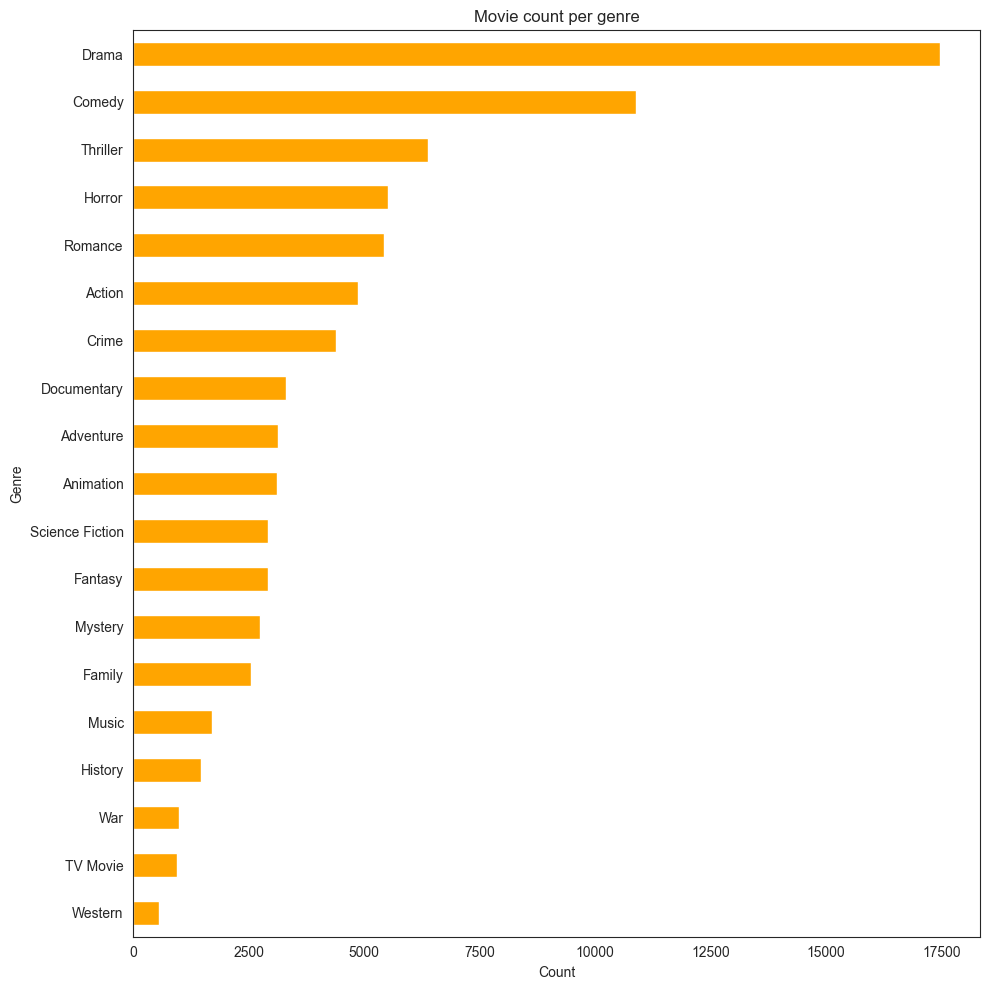

In [10]:
genre_counts=(movies_st1['genre'].str.split(',').explode().str.strip().value_counts())
plt.figure(figsize=(10,10))
genre_counts.plot(kind='barh',color='orange',grid=False)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Movie count per genre')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [11]:
movies_st1['theme']= np.where(movies_st1['theme'].isna(),movies_st1['description'],movies_st1['theme'])
movies_st1.tail()

C:\Users\Silon\AppData\Local\Temp\ipykernel_15836\2619044183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_st1['theme']= np.where(movies_st1['theme'].isna(),movies_st1['description'],movies_st1['theme'])


,id,name,date,description,minute,rating,actor,director,genre,language,poster,theme
36662,1036663,Love Bites,1988.0,"Meet Jake Hunter. He's young, he's cute and he...",69.0,3.41,"Kevin Glover, Kevin Glover, Bernard Barnes Jar...",Marvin Jones,"Horror, Comedy",English,https://a.ltrbxd.com/resized/film-poster/2/9/6...,"Meet Jake Hunter. He's young, he's cute and he..."
36663,1036664,Viraata Parvam,2022.0,Vennela has fallen for Aranya aka Ravanna’s po...,150.0,3.21,"Sai Pallavi, Rana Daggubati, Priyamani, Nandit...",Venu Udugula,"Romance, Drama",Telugu,https://a.ltrbxd.com/resized/film-poster/5/3/6...,Vennela has fallen for Aranya aka Ravanna’s po...
36664,1036665,Asako in Ruby Shoes,2000.0,Asako in Ruby Shoes succeeds in providing yet ...,117.0,3.39,"Lee Jung-jae, Misato Tachibana, Urara Awata, K...",Lee Je-Yong,"Romance, Drama","Korean, Korean, Japanese",https://a.ltrbxd.com/resized/film-poster/2/4/8...,Asako in Ruby Shoes succeeds in providing yet ...
36665,1036666,I Am Vanessa Guillen,2022.0,A young woman dreamed of a military career. In...,95.0,3.40,Jackie Speier,Christy Wegener,Documentary,English,https://a.ltrbxd.com/resized/film-poster/9/2/8...,A young woman dreamed of a military career. In...
36666,1036667,The United States of America,2022.0,"A crisscross through the USA, carving it up in...",98.0,3.61,NaN,James Benning,Documentary,NaN,https://a.ltrbxd.com/resized/film-poster/8/2/2...,"A crisscross through the USA, carving it up in..."


In [12]:
movies_st1['tagged_description']=movies_st1[['id','description']].astype(str).agg(' '.join,axis=1)
movies_st1.head()

C:\Users\Silon\AppData\Local\Temp\ipykernel_15836\3638810040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_st1['tagged_description']=movies_st1[['id','description']].astype(str).agg(' '.join,axis=1)


,id,name,date,description,minute,rating,actor,director,genre,language,poster,theme,tagged_description
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,"Margot Robbie, Ryan Gosling, America Ferrera, ...",Greta Gerwig,"Comedy, Adventure",English,https://a.ltrbxd.com/resized/film-poster/2/7/7...,Humanity and the world around us.Crude humor a...,1000001 Barbie and Ken are having the time of ...
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",Bong Joon-ho,"Comedy, Thriller, Drama","Korean, English, German, Korean",https://a.ltrbxd.com/resized/film-poster/4/2/6...,Humanity and the world around us.Intense viole...,"1000002 All unemployed, Ki-taek's family takes..."
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"Michelle Yeoh, Ke Huy Quan, Stephanie Hsu, Jam...","Daniel Scheinert, Daniel Kwan","Science Fiction, Adventure, Comedy, Action","English, Cantonese, Chinese, English",https://a.ltrbxd.com/resized/film-poster/4/7/4...,Humanity and the world around us.Moving relati...,1000003 An aging Chinese immigrant is swept up...
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,"Edward Norton, Brad Pitt, Helena Bonham Carter...",David Fincher,Drama,English,https://a.ltrbxd.com/resized/film-poster/5/1/5...,Intense violence and sexual transgression.Huma...,1000004 A ticking-time-bomb insomniac and a sl...
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"Ryan Gosling, Emma Stone, John Legend, Rosemar...",Damien Chazelle,"Drama, Comedy, Music, Romance",English,https://a.ltrbxd.com/resized/film-poster/2/4/0...,Song and dance.Humanity and the world around u...,"1000005 Mia, an aspiring actress, serves latte..."


In [13]:
movies_st1

,id,name,date,description,minute,rating,actor,director,genre,language,poster,theme,tagged_description
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,"Margot Robbie, Ryan Gosling, America Ferrera, ...",Greta Gerwig,"Comedy, Adventure",English,https://a.ltrbxd.com/resized/film-poster/2/7/7...,Humanity and the world around us.Crude humor a...,1000001 Barbie and Ken are having the time of ...
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Cho...",Bong Joon-ho,"Comedy, Thriller, Drama","Korean, English, German, Korean",https://a.ltrbxd.com/resized/film-poster/4/2/6...,Humanity and the world around us.Intense viole...,"1000002 All unemployed, Ki-taek's family takes..."
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"Michelle Yeoh, Ke Huy Quan, Stephanie Hsu, Jam...","Daniel Scheinert, Daniel Kwan","Science Fiction, Adventure, Comedy, Action","English, Cantonese, Chinese, English",https://a.ltrbxd.com/resized/film-poster/4/7/4...,Humanity and the world around us.Moving relati...,1000003 An aging Chinese immigrant is swept up...
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,"Edward Norton, Brad Pitt, Helena Bonham Carter...",David Fincher,Drama,English,https://a.ltrbxd.com/resized/film-poster/5/1/5...,Intense violence and sexual transgression.Huma...,1000004 A ticking-time-bomb insomniac and a sl...
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"Ryan Gosling, Emma Stone, John Legend, Rosemar...",Damien Chazelle,"Drama, Comedy, Music, Romance",English,https://a.ltrbxd.com/resized/film-poster/2/4/0...,Song and dance.Humanity and the world around u...,"1000005 Mia, an aspiring actress, serves latte..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36662,1036663,Love Bites,1988.0,"Meet Jake Hunter. He's young, he's cute and he...",69.0,3.41,"Kevin Glover, Kevin Glover, Bernard Barnes Jar...",Marvin Jones,"Horror, Comedy",English,https://a.ltrbxd.com/resized/film-poster/2/9/6...,"Meet Jake Hunter. He's young, he's cute and he...","1036663 Meet Jake Hunter. He's young, he's cut..."
36663,1036664,Viraata Parvam,2022.0,Vennela has fallen for Aranya aka Ravanna’s po...,150.0,3.21,"Sai Pallavi, Rana Daggubati, Priyamani, Nandit...",Venu Udugula,"Romance, Drama",Telugu,https://a.ltrbxd.com/resized/film-poster/5/3/6...,Vennela has fallen for Aranya aka Ravanna’s po...,1036664 Vennela has fallen for Aranya aka Rava...
36664,1036665,Asako in Ruby Shoes,2000.0,Asako in Ruby Shoes succeeds in providing yet ...,117.0,3.39,"Lee Jung-jae, Misato Tachibana, Urara Awata, K...",Lee Je-Yong,"Romance, Drama","Korean, Korean, Japanese",https://a.ltrbxd.com/resized/film-poster/2/4/8...,Asako in Ruby Shoes succeeds in providing yet ...,1036665 Asako in Ruby Shoes succeeds in provid...
36665,1036666,I Am Vanessa Guillen,2022.0,A young woman dreamed of a military career. In...,95.0,3.40,Jackie Speier,Christy Wegener,Documentary,English,https://a.ltrbxd.com/resized/film-poster/9/2/8...,A young woman dreamed of a military career. In...,1036666 A young woman dreamed of a military ca...


In [14]:
movies_st1.to_csv('movies_cleaned.csv',index=False)